In [118]:
import thesis_plots
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from thesis_plots import mathrm

In [119]:
def get_df(name):
    data = []
    with open(
        os.path.join(thesis_plots.root_folder, 'data', 'planck',name),
        'r') as file:
        for l in file:
            if l.startswith('#'):
                headers = l.split()[1:]
                continue
    #         print(l.split())
    #         break
            data.append([float(f) for f in l.split()])
    return pd.DataFrame(data, columns=headers)


In [120]:
!ls ../data/planck

COM_PowerSpect_CMB-TT-binned_R3.01.txt
COM_PowerSpect_CMB-TT-binned_R3.01.txt:Zone.Identifier
COM_PowerSpect_CMB-TT-full_R3.01.txt
COM_PowerSpect_CMB-TT-full_R3.01.txt:Zone.Identifier
COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt
COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt:Zone.Identifier
COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum_R3.01.txt
COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum_R3.01.txt:Zone.Identifier
README.md


In [121]:
df = pd.concat(
    [get_df('COM_PowerSpect_CMB-TT-full_R3.01.txt')[:29], get_df('COM_PowerSpect_CMB-TT-binned_R3.01.txt')]
)

In [122]:
data = df.values.T

In [123]:
data_fit = get_df('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt').values.T

In [124]:
get_df('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt')

L         TT       TE        EE        BB            PP
0        2.0  1016.7300  2.61753  0.030883  0.000002  5.013520e-08
1        3.0   963.7270  2.93806  0.039690  0.000004  6.099430e-08
2        4.0   912.6080  2.75866  0.034496  0.000006  7.025920e-08
3        5.0   874.4770  2.35185  0.023094  0.000009  7.829210e-08
4        6.0   848.5090  1.89605  0.012951  0.000013  8.530200e-08
...      ...        ...      ...       ...       ...           ...
2502  2504.0    77.6127 -2.96537  2.910040  0.000000  0.000000e+00
2503  2505.0    77.3908 -2.97153  2.913030  0.000000  0.000000e+00
2504  2506.0    77.1691 -2.97827  2.916090  0.000000  0.000000e+00
2505  2507.0    76.9485 -2.98537  2.919000  0.000000  0.000000e+00
2506  2508.0    76.7311 -2.99293  2.921890  0.000000  0.000000e+00

[2507 rows x 6 columns]

In [125]:
thesis_plots.setup_plt()

In [126]:
bins = np.unique(np.logspace(np.log10(2), np.log10(2500), 250).astype(int)).astype(float) - 0.5


In [127]:
np.average??

In [128]:
np.average([1,0], weights=[1, 5])

0.16666666666666666

In [129]:
def bin_data(x, y, yer, bins):
    res = defauldict(list)
    for b_l, b_r in zip(bins[:-1], bins[1:]):
        res['x'] += [b_l + b_r / 2]
        rex['dx'] += [b_r - b_l]
        mask =  x >= b_l
        mask &= x < b_l
        res['y'] += [np.average(y[mask], weights=1/y[mask]**2)]
        res['dy'] += [np.sum(yerr)/np.sum(mask)]
    return res

In [130]:
bin_data(data, data)

TypeError: bin_data() missing 2 required positional arguments: 'yer' and 'bins'

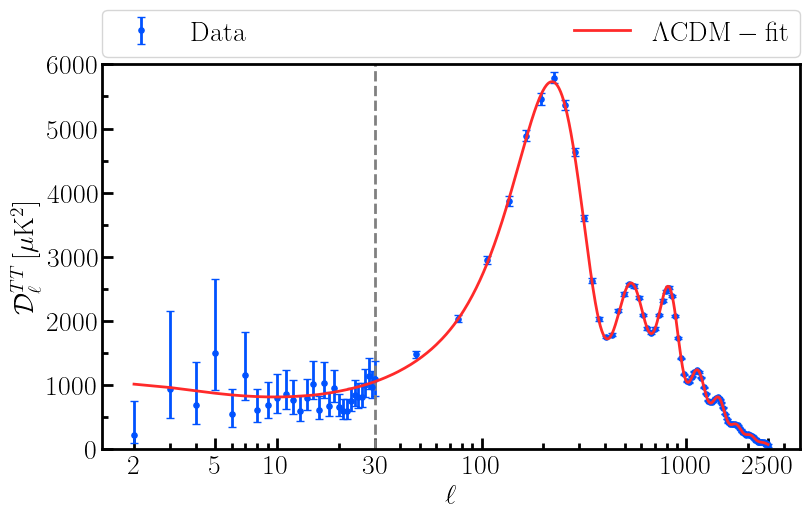

In [168]:
plt.figure(figsize=(9,5))
kw = dict(ls='', capsize=3, marker='.', markersize=7.5)
plt.plot([], [])
plt.errorbar(data[0], data[1], yerr=[data[2], data[3]], **kw, label=mathrm('Data'))
plt.plot(data_fit[0], data_fit[1], zorder=10, marker='', label='$\Lambda$'+mathrm('CDM-fit'))

# plt.plot(data[0], data[-1])
plt.xscale('log')
plt.gca().set_xticks(xs:=[2, 5, 10, 30, 100, 1000, 2500], [mathrm(str(i)) for i in xs])
plt.axvline(30, ls='--', c='gray') 
plt.ylabel('$\mathcal{D}_\ell^{TT}\,[\mu \mathrm{K}^2]$')
plt.xlabel('$\ell$')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], **thesis_plots.legend_kw(ncol=3))
plt.ylim(0,6000)
plt.gca().set_yticks(range(0,6000,500), minor=True);
thesis_plots.save_fig('planck_cdm')